LSTM Implementation on Stock exchange Data

In [ ]:
#All required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow import keras 
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from keras.optimizers import Adam

In [ ]:
#Import Data into pandas data frame

StockData = pd.read_csv('/content/indexData.csv')

In [ ]:
#sample display the contents

StockData.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0


In [ ]:
StockData.count()

Index        112457
Date         112457
Open         110253
High         110253
Low          110253
Close        110253
Adj Close    110253
Volume       110253
dtype: int64

In [ ]:
StockData.dropna(inplace=True)

In [ ]:
# Checking for what index types how much data is available
StockData.groupby(['Index']).count()

,Date,Open,High,Low,Close,Adj Close,Volume
Index,,,,,,,
000001.SS,5791,5791,5791,5791,5791,5791,5791
399001.SZ,5760,5760,5760,5760,5760,5760,5760
GDAXI,8438,8438,8438,8438,8438,8438,8438
GSPTSE,10526,10526,10526,10526,10526,10526,10526
HSI,8492,8492,8492,8492,8492,8492,8492
IXIC,12690,12690,12690,12690,12690,12690,12690
J203.JO,2346,2346,2346,2346,2346,2346,2346
KS11,6029,6029,6029,6029,6029,6029,6029
N100,5474,5474,5474,5474,5474,5474,5474


In [ ]:
# Since each index is different region and have different currencies lets try to  focus on single index 'NYA' which is newyork stock exchange.

StockData_NYA=StockData[StockData['Index']=='NYA']

In [ ]:
StockData_NYA.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0


In [ ]:
# Data looks to have random dates need to do some data cleaning for date column and maintain constant intervals of time
# checking for duplicates in date column.

duplicates=StockData_NYA.Date.duplicated()
print(duplicates.sum())

0


In [ ]:
# Check for how many time steps data is available 
StockData_NYA.count()

Index        13947
Date         13947
Open         13947
High         13947
Low          13947
Close        13947
Adj Close    13947
Volume       13947
dtype: int64

In [ ]:
StockData_NYA.info()
type(StockData_NYA.Date)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13947 entries, 0 to 13947
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      13947 non-null  object 
 1   Date       13947 non-null  object 
 2   Open       13947 non-null  float64
 3   High       13947 non-null  float64
 4   Low        13947 non-null  float64
 5   Close      13947 non-null  float64
 6   Adj Close  13947 non-null  float64
 7   Volume     13947 non-null  float64
dtypes: float64(6), object(2)
memory usage: 980.6+ KB


pandas.core.series.Series

In [ ]:
StockData_NYA.Date[0:50]

0     1965-12-31
1     1966-01-03
2     1966-01-04
3     1966-01-05
4     1966-01-06
5     1966-01-07
6     1966-01-10
7     1966-01-11
8     1966-01-12
9     1966-01-13
10    1966-01-14
11    1966-01-17
12    1966-01-18
13    1966-01-19
14    1966-01-20
15    1966-01-21
16    1966-01-24
17    1966-01-25
18    1966-01-26
19    1966-01-27
20    1966-01-28
21    1966-01-31
22    1966-02-01
23    1966-02-02
24    1966-02-03
25    1966-02-04
26    1966-02-07
27    1966-02-08
28    1966-02-09
29    1966-02-10
30    1966-02-11
31    1966-02-14
32    1966-02-15
33    1966-02-16
34    1966-02-17
35    1966-02-18
36    1966-02-21
37    1966-02-23
38    1966-02-24
39    1966-02-25
40    1966-02-28
41    1966-03-01
42    1966-03-02
43    1966-03-03
44    1966-03-04
45    1966-03-07
46    1966-03-08
47    1966-03-09
48    1966-03-10
49    1966-03-11
Name: Date, dtype: object

In [ ]:
StockData_NYA['Date'] = pd.to_datetime(StockData_NYA['Date'])
StockData_NYA.set_index('Date', inplace=True)

<ipython-input-63-2ab49efbadd1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  StockData_NYA['Date'] = pd.to_datetime(StockData_NYA['Date'])


In [ ]:
# resampling the data by summarising every 3 days
StockData_NYA_AGG = StockData_NYA.resample('3D').mean()

In [ ]:
StockData_NYA_AGG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6746 entries, 1965-12-31 to 2021-05-26
Freq: 3D
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6628 non-null   float64
 1   High       6628 non-null   float64
 2   Low        6628 non-null   float64
 3   Close      6628 non-null   float64
 4   Adj Close  6628 non-null   float64
 5   Volume     6628 non-null   float64
dtypes: float64(6)
memory usage: 368.9 KB


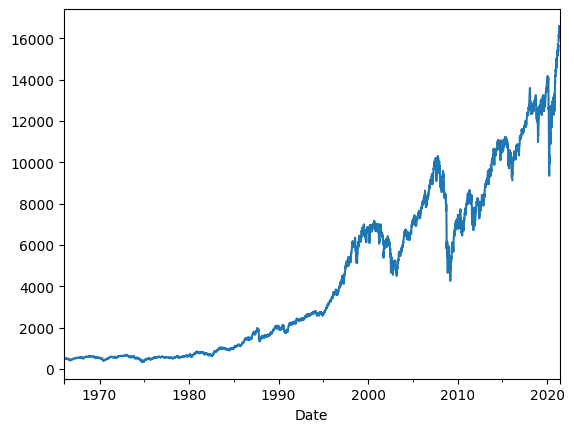

pandas.core.frame.DataFrame

In [ ]:
StockData_NYA_AGG['Open'].plot()
plt.show()
type(StockData_NYA_AGG)

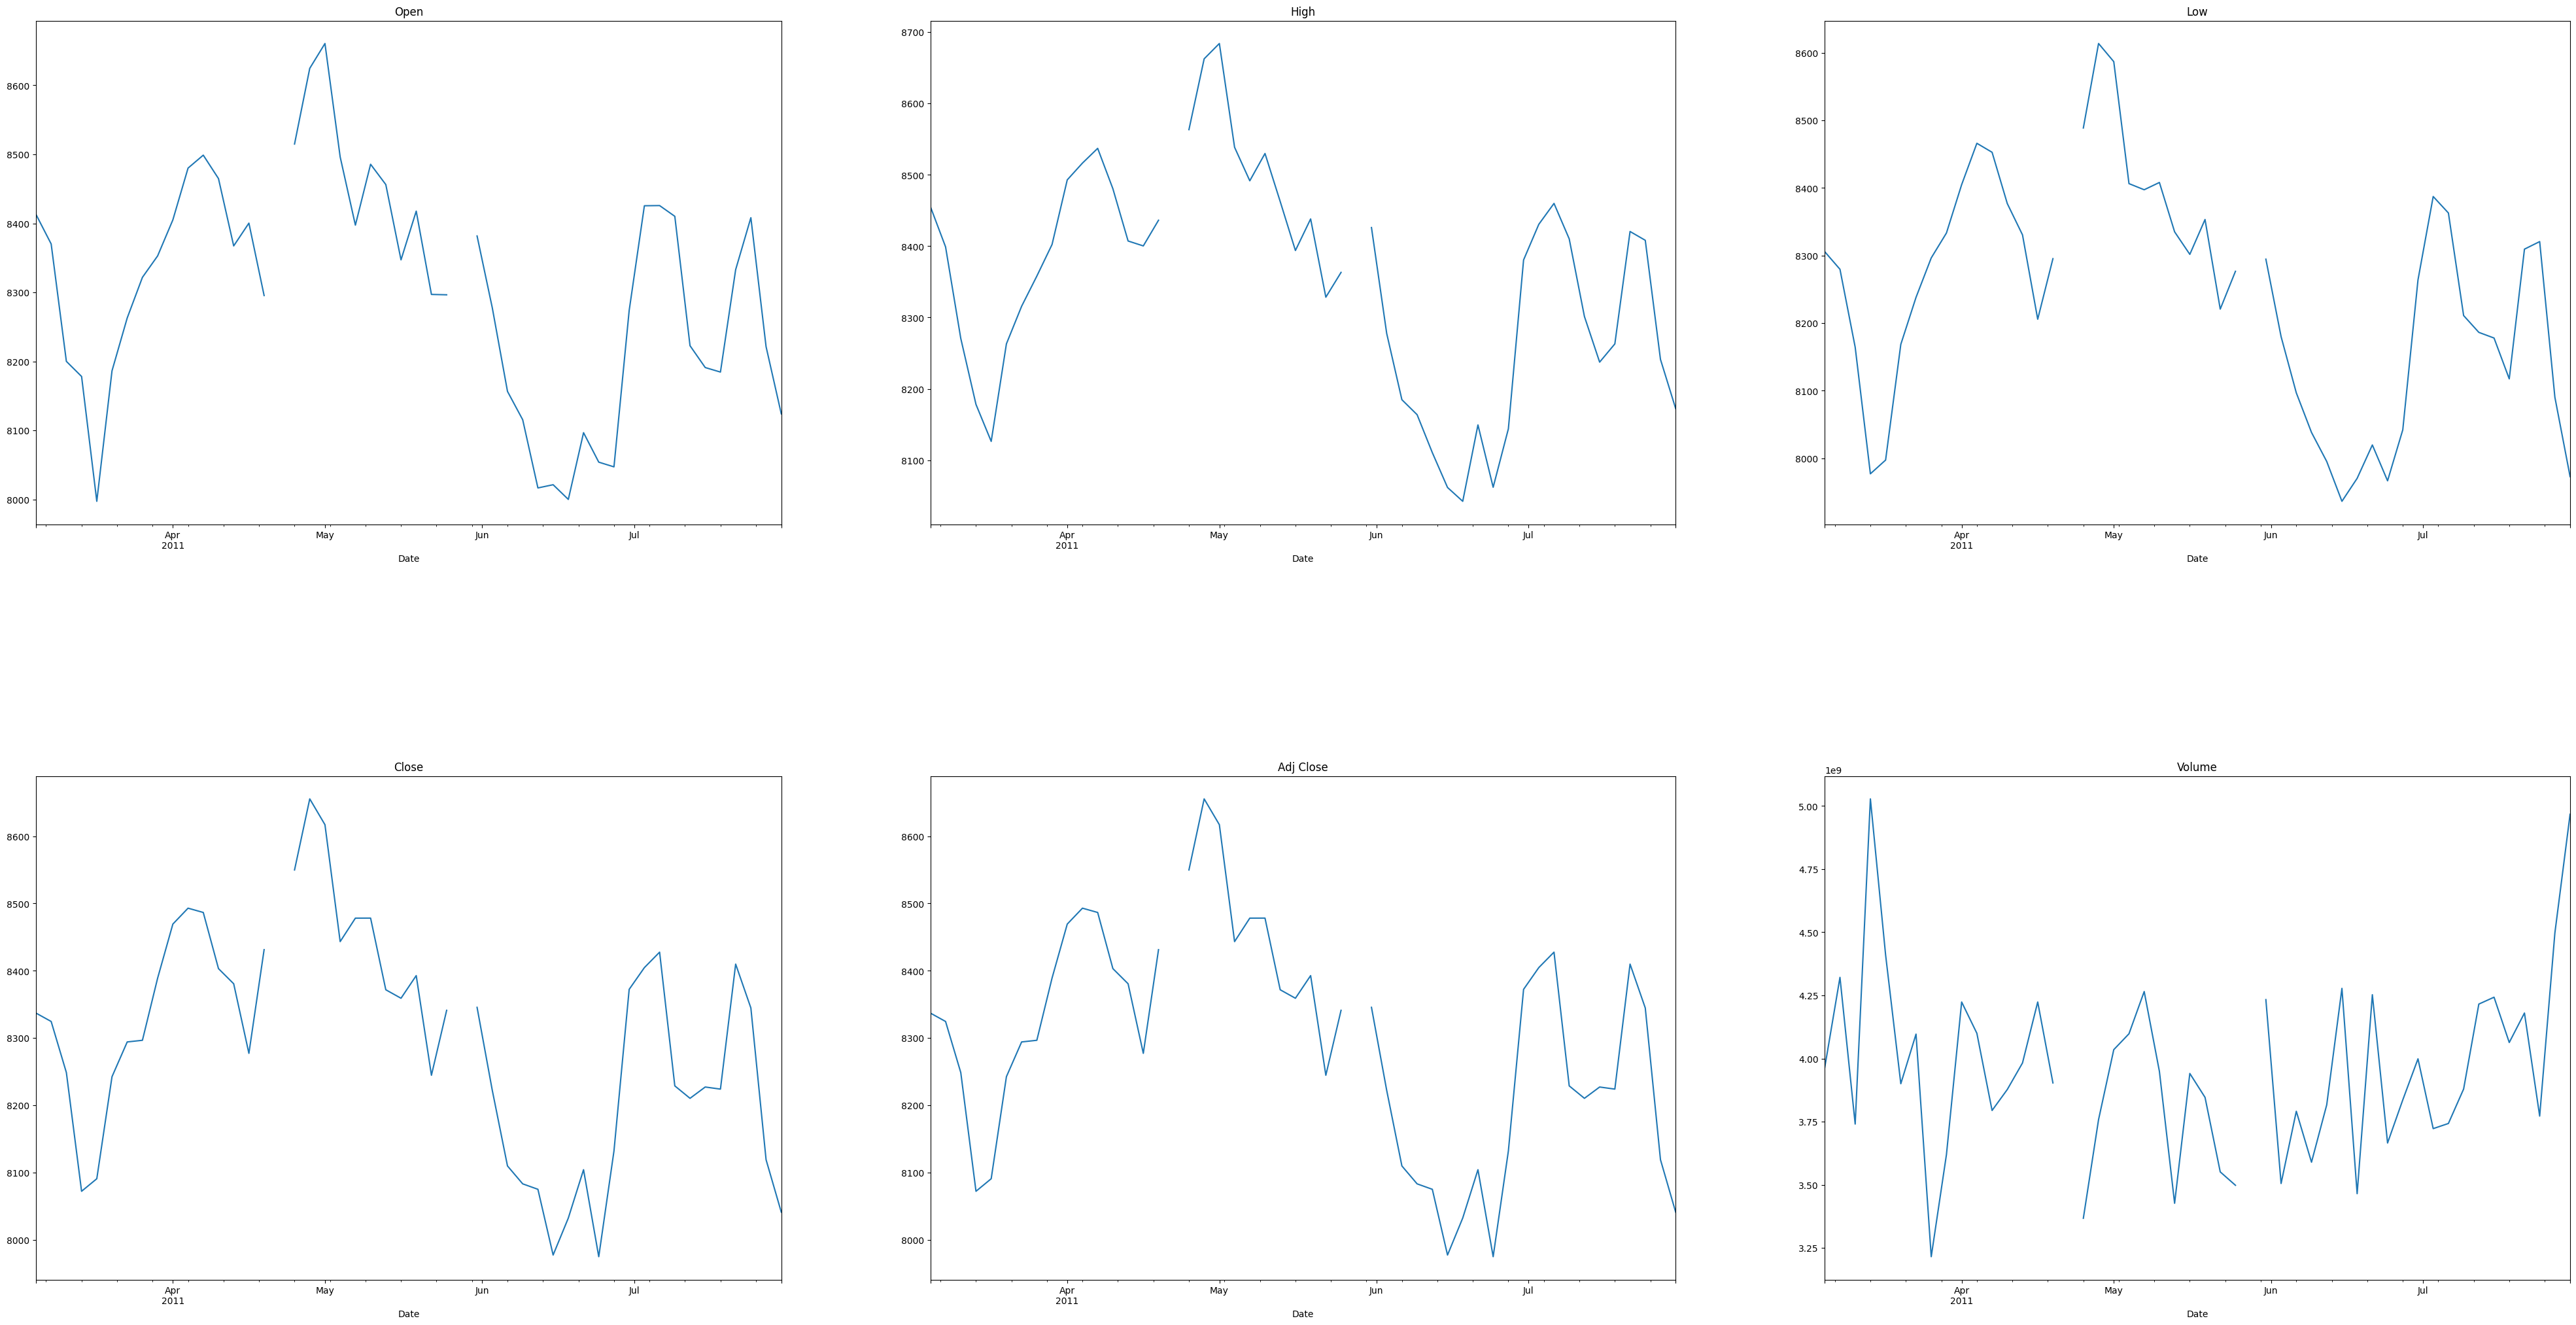

In [ ]:
# checking the distributions for different columns 

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(50, 25))

axe=axes.ravel()

for i, col in enumerate(StockData_NYA_AGG.columns):
    StockData_NYA_AGG[col].iloc[5500:5550].plot(ax=axe[i])
    axe[i].set_title(col)
    
fig.subplots_adjust(hspace=0.5)


In [ ]:
print(StockData_NYA_AGG.isnull().sum())

Open         118
High         118
Low          118
Close        118
Adj Close    118
Volume       118
dtype: int64


In [ ]:
# back ward fill for the missing values
StockData_NYA_AGG = StockData_NYA_AGG.fillna(method='bfill')

In [ ]:
print(StockData_NYA_AGG.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
StockData_NYA_AGG.count()

Open         6746
High         6746
Low          6746
Close        6746
Adj Close    6746
Volume       6746
dtype: int64

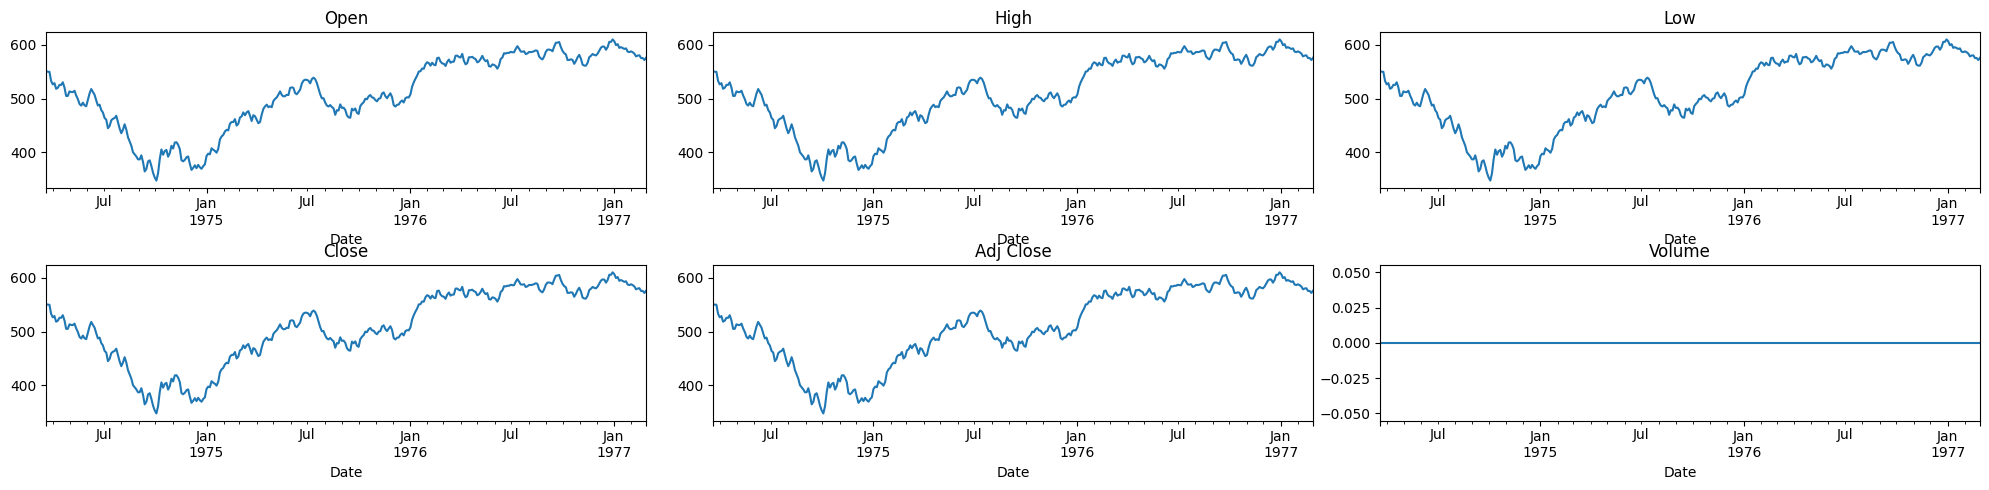

In [ ]:
# checking the distributions for different columns 

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 5))

axe=axes.ravel()

for i, col in enumerate(StockData_NYA_AGG.columns):
    StockData_NYA_AGG[col].iloc[1000:1360].plot(ax=axe[i])
    axe[i].set_title(col)

plt.tight_layout()
fig.subplots_adjust(hspace=0.5)

<Axes: xlabel='Date'>

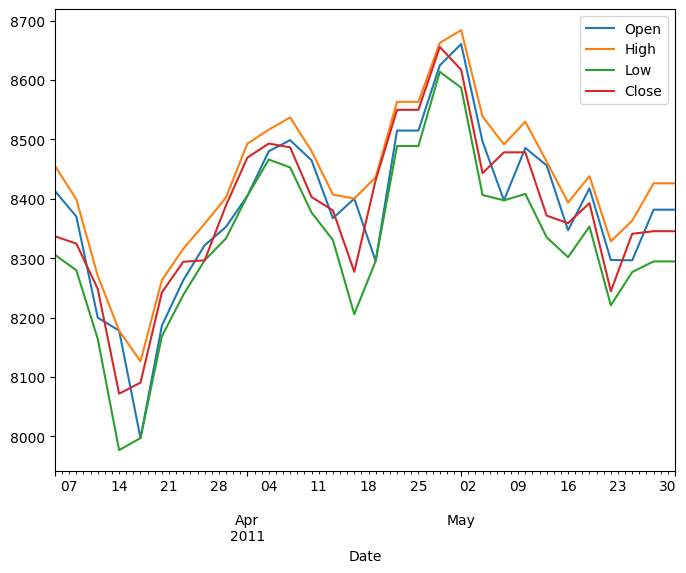

In [ ]:
StockData_NYA_AGG.iloc[5500:5530].plot(y=['Open', 'High','Low', 'Close'], figsize=(8, 6))

In [ ]:
print(StockData_NYA_AGG.count())
# creating training and testing sets
train_data = StockData_NYA_AGG[:6620]
test_data = StockData_NYA_AGG[6620:]

Open         6746
High         6746
Low          6746
Close        6746
Adj Close    6746
Volume       6746
dtype: int64


In [ ]:
StockData_NYA_AGG.dropna(inplace=True)

In [ ]:
StockData_NYA_AGG.shape

(6746, 6)

In [ ]:
# Goal is to predict closing value for stock using open,high,low values.

StockData_NYA_AGG=StockData_NYA_AGG.iloc[:,0:4] 
StockData_NYA_AGG.head(4)

,Open,High,Low,Close
Date,,,,
1965-12-31,528.690002,528.690002,528.690002,528.690002
1966-01-03,528.723348,528.723348,528.723348,528.723348
1966-01-06,532.334992,532.334992,532.334992,532.334992
1966-01-09,534.079987,534.079987,534.079987,534.079987


In [ ]:
# since lstm is very baised to different scales it's better to normalise the data before feeding it to model.
scaler = StandardScaler()
scaler = scaler.fit(StockData_NYA_AGG)
Scaled_StockData_NYA = scaler.transform(StockData_NYA_AGG)

In [ ]:
StockData_NYA_AGG_Close= StockData_NYA_AGG.iloc[:,3]
StockData_NYA_AGG_Close_array = np.array(StockData_NYA_AGG_Close)
StockData_NYA_AGG_Close_array_reshaped = StockData_NYA_AGG_Close_array.reshape(-1,1)

In [ ]:
# creating scaler object seperatley for target to inverse transform predictions
scaler_close = StandardScaler()
scaler_close = scaler_close.fit(StockData_NYA_AGG_Close_array_reshaped)
Scaled_StockData_NYA_close = scaler_close.transform(StockData_NYA_AGG_Close_array_reshaped)

In [ ]:
Scaled_StockData_NYA.shape

(6746, 4)

In [ ]:
# Since Lstm works better with sequences its better to make data sequences to train the model

# Basically what happens here is we are taking a sequence length of time stamps and using sequence length + 1 time stamp data as target 

def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data)-seq_length):
        X.append(data[i:i+seq_length, :])
        y.append(data[i+seq_length, -1])
    return np.array(X), np.array(y)

In [ ]:
# By looking at the nature it is very uncertain to choose sequences because every year data seems to vary differently so lets begin with 30 and see perfermance
seq_length = 15

In [ ]:
# create sequences of input data and target data
X, Y = create_sequences(Scaled_StockData_NYA, seq_length)

In [ ]:
Y.shape

(6731,)

In [ ]:
# Split the data in to train and test

train_size = int(len(X) * 0.90)
X_train, y_train = X[:train_size], Y[:train_size]
X_test, y_test = X[train_size:], Y[train_size:]

In [ ]:
X_train.shape

(6057, 15, 4)

In [ ]:
# Set the learning rate
learning_rate = 0.001

# Create an instance of the Adam optimizer with the specified learning rate
adam = Adam(lr=learning_rate)

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
# define the model
model = Sequential()
model.add(LSTM(45, return_sequences=True, input_shape=(seq_length, X.shape[2])))
model.add(LSTM(30,return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', metrics=['mae'], loss='mse')

In [ ]:
# train the model
model.fit(X_train, y_train, batch_size=50, epochs=50, validation_split=0.1)

Epoch 1/50
110/110 [==============================] - 9s 39ms/step - loss: 0.0416 - mae: 0.1102 - val_loss: 0.0238 - val_mae: 0.1241
Epoch 2/50
110/110 [==============================] - 2s 21ms/step - loss: 0.0014 - mae: 0.0255 - val_loss: 0.0061 - val_mae: 0.0659
Epoch 3/50
110/110 [==============================] - 2s 21ms/step - loss: 9.8795e-04 - mae: 0.0176 - val_loss: 0.0037 - val_mae: 0.0479
Epoch 4/50
110/110 [==============================] - 2s 21ms/step - loss: 9.1302e-04 - mae: 0.0169 - val_loss: 0.0054 - val_mae: 0.0596
Epoch 5/50
110/110 [==============================] - 2s 22ms/step - loss: 8.6329e-04 - mae: 0.0168 - val_loss: 0.0029 - val_mae: 0.0422
Epoch 6/50
110/110 [==============================] - 3s 31ms/step - loss: 7.9589e-04 - mae: 0.0162 - val_loss: 0.0029 - val_mae: 0.0424
Epoch 7/50
110/110 [==============================] - 2s 21ms/step - loss: 7.8637e-04 - mae: 0.0168 - val_loss: 0.0035 - val_mae: 0.0489
Epoch 8/50
110/110 [=============================

In [ ]:
y_pred=model.predict(X_test)

22/22 [==============================] - 1s 8ms/step


In [ ]:
y_test.shape

(674,)

In [ ]:
y_test_i = scaler_close.inverse_transform(y_test.reshape(-1,1))
y_pred_i = scaler_close.inverse_transform(y_pred)

In [ ]:
count=0
for item in y_pred:
  if(item<0):
    count=count+1
print(count)

0


In [ ]:
type(y_test)

numpy.ndarray

In [ ]:

mse = mean_squared_error(y_test_i, y_pred_i)

# calculate the root mean squared error
rmse = np.sqrt(mse)
mean_abs=mean_absolute_error(y_test_i, y_pred_i)

# calculate the range of the true values
y_range = np.max(y_test_i) - np.min(y_test_i)

# calculate the normalized root mean squared error
nrmse = np.sqrt(mse) / y_range

# express NRMSE as a percentage
nrmse = nrmse * 100

print(f'rmse : {rmse}')
print(f'mse:{mse}')
print(f'mean_abs: {mean_abs}')

rmse : 310.10159548134266
mse:96162.99952007429
mean_abs: 202.3636825847861
